# Generalized Linear Models

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd

Linear regressions have limitations.

As it stands, the algorithm could generate a prediction *anywhere on the real number line*. This *may* be realistic, like if I'm predicting national surpluses/debts.

But what if I'm predicting values of a variable that doesn't take, say, negative values, like temperature in Kelvin? (Or, gulp, housing prices?)

What if I'm predicting values of a variable that takes only integer values, like the number of mouseclicks on my killer ds blog per minute?

What if I'm predicting probabilities? Or something Boolean / Bernoullian?

What if my the shape of my errors changes as a function of the value of the dependent variable?

Am I stuck using linear regression? There's got to be a better way!

The strategy now is to *generalize* the notion of linear regression; regression will become a special case. In particular, we'll keep the idea of the regression best-fit line, but now **we'll allow the model to be constructed from the dependent variable through some (non-trivial) function of the linear predictor**. This function is standardly called the **link function**.

Let's say we've constructed our best-fit line, i.e. our linear predictor, $\hat{L} = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

## Logistic Regression

Consider the following transformation: <br/>
$\large\hat{y} = \Large\frac{1}{1 + e^{-\hat{L}}} \large= \Large\frac{1}{1 + e^{-\beta_0 + ... + \beta_nx_n}}$. This is called the **sigmoid function**.

We're imagining that $\hat{L}$ can take any values between $-\infty$ and $\infty$.

$\large\rightarrow$ But what values can $\hat{y}$ take? What does this function even look like?

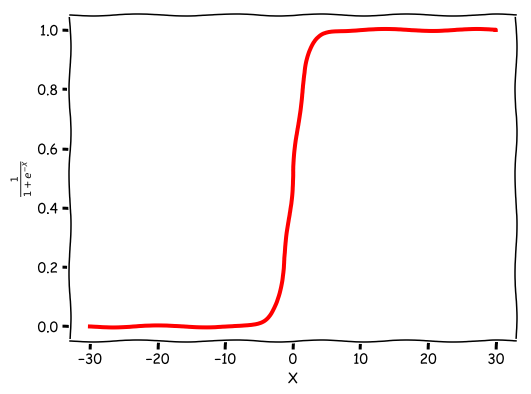

In [61]:
# Let's plot this function here:

X = np.linspace(-30, 30, 300)

with plt.xkcd():
    plt.figure(figsize = (8, 6))

    plt.xlabel('X')
    plt.ylabel('$\\frac{1}{1 + e^{-X}}$')
    plt.plot(X, 1 / (1 + np.exp(-X)), 'r', lw=4);

How do we fit a line to our dependent variable if its values are already stored as probabilities? We can use the inverse of the sigmoid function, and just set our regression equation equal to that. The inverse of the sigmoid function is called the **logit function**, and it looks like this:

$\large f(y) = \ln\left(\frac{y}{1 - y}\right)$. Notice that the domain of this function is $(0, 1)$.

$\hspace{110mm}$(Quick proof that logit and sigmoid are inverse functions:

$\hspace{170mm}x = \frac{1}{1 + e^{-y}}$; <br/>
$\hspace{170mm}$so $1 + e^{-y} = \frac{1}{x}$; <br/>
$\hspace{170mm}$so $e^{-y} = \frac{1 - x}{x}$; <br/>
$\hspace{170mm}$so $-y = \ln\left(\frac{1 - x}{x}\right)$; <br/>
$\hspace{170mm}$so $y = \ln\left(\frac{x}{1 - x}\right)$.)

Our regression equation will now look like this:

$\large\ln\left(\frac{y}{1 - y}\right) = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

This equation is used for a **logistic regression**: Its characteristic link function is this logit function.

There are other ways to squeeze the results of a linear regression into the set (0, 1).

But *this* function represents the **log-odds** of success (y = 1).

### Logistic Regression in Sci-kit Learn

In [29]:
from sklearn.linear_model import LogisticRegression

data = pd.DataFrame([[4.0, 650, 750, 1], [3.0, 780, 780, 1],
                     [2.0, 570, 600, 0], [2.5, 780, 770, 1],
                    [3.8, 600, 550, 0], [1.5, 600, 650, 0]],
                    columns=['gpa', 'sat_v', 'sat_q', 'admitted'])


X = data.drop('admitted', axis=1)
y = data['admitted']

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X, y)

logreg.predict([[4.0, 600, 700]])

/Users/gdamico/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1])

## Poisson Regression

Here's a different sort of regression equation:

$\large\ln(y) = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$. The link function is simply $\ln(y)$ and so we have:

$\large\hat{y} = e^\hat{L} = e^{\beta_0 + ... + \beta_nx_n}$.

The domain, or "support", for a Poisson distribution is {0, 1, 2, ... }. Can you see why?

### Poisson Regression in Statsmodels

In [25]:
awards = pd.read_csv('https://stats.idre.ucla.edu/stat/data/poisson_sim.csv')

In [26]:
awards.head()

,id,num_awards,prog,math
0,45,0,3,41
1,108,0,1,41
2,15,0,3,44
3,67,0,3,42
4,153,0,3,40


What is this dataset about?

The data show the number of awards earned by students at one high school. 'Prog' is a coded version of the sort of program in which the student was enrolled and 'math' is a score on a math exam.

In [27]:
awards_with_dums = pd.concat([awards.drop('prog', axis=1), pd.get_dummies(awards['prog'])], axis=1)
awards_with_dums.head()

,id,num_awards,math,1,2,3
0,45,0,41,0,0,1
1,108,0,41,1,0,0
2,15,0,44,0,0,1
3,67,0,42,0,0,1
4,153,0,40,0,0,1


In [28]:
awards_with_dums.columns

Index(['id', 'num_awards', 'math', 1, 2, 3], dtype='object')

In [58]:
X = sm.add_constant(awards_with_dums[['math', 1, 2, 3]])
y = awards['num_awards']

poimodel = sm.GLM(y, X, sm.families.Poisson())
poimodel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             num_awards   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -182.75
Date:                Mon, 06 May 2019   Deviance:                       189.45
Time:                        12:18:38   Pearson chi2:                     212.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5719      0.459     -7.774      0.000      -4.472      -2.671
math           0.0702      0.011      6.619      0.000       0.049       0.091
1             -1.6752      0.289     -5.804      0.000      -2.241      -1.109
2             -0.5913      0.248     -2.380      0.017      -1.078      -0.104
3             -1.3054      0.259     -5.040      0.000      -1.813      -0.798
==============================================================================
"""

In [22]:
np.exp(0.0702)

1.072722704342061

Wikipedia has a very helpful page about generalized linear models! <br/> Access it here: https://en.wikipedia.org/wiki/Generalized_linear_model